# Final Project - Airline Passenger Satisfaction

Danielle Aras

The dataset I chose for my project is titled "Airline Passenger Satisfaction", obtained from kaggle.com

https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction

This dataset contains anonymous feedback from customer surveys taken after flights. There is basic information about the flight and passenger such as the passenger's gender, age, their reason for travelling, cabin class, departure and arrival delays, and flight distance. It also contains the passengers' ratings of different aspects of the flight, taken on a scale from 0 to 5. There are 14 different ratings, ranging from the amount of legroom to the ease of booking the flight. There is also an overall satisfaction option which categorizes each passenger as either "satisfied" or "neutral or dissatisfied" with the flight. There are 103904 rows total and 25 columns in the original dataset.

My goal is to create an accurate model to predict satisfaction based on a subset of the features of the data, and identify which features have the most direct impact on overall customer satisfaction, and may be used to predict satisfaction. This would be useful to an airline looking to improve its customer experience by identifying the aspects it should focus on improving in order to see the biggest increase in satisfaction. This is a problem of classification, as the data has two discrete "outcomes": satisfied or neutral/dissatisfied.

To begin, I started by importing the dataset, looking through the columns and values, and cleaning up the data:

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics, svm
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('airline_satisfaction.csv')

I looked at the description of each column. The data had clearly already been cleaned up a lot as the majority of the columns all had 103,904 rows and it appeared only the "Arrival Delay in Minutes" column had some NAN values.

In [3]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


I made the decision to drop the 'Unnamed: 0' column because it was a duplicate of the index. I also filled in the missing values in the arrival delay column with zero as I assumed a missing value would logically mean there was no delay.

In [4]:
df = df.drop(columns=['Unnamed: 0'])

In [5]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(0)

In [6]:
df.dtypes

id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

In [7]:
df = df.dropna()

To make the data easier to process, I converted all object columns into numeric or boolean as follows:

* Reassign gender to numeric - Male = 1, Female = 0
* Reassign class to numeric - Business = 1, Eco Plus = 2, Eco = 3
* Reassign satisfaction to boolean
* Reassign customer type to numeric - Loyal Customer = 1, Disloyal Customer = 0
* Reassign type of travel to numeric - Personal Travel = 1, Business travel = 0

I then updated their type to reflect the new values

In [8]:
df_n = df.replace({'Gender': {'Male' : 1, 'Female' : 0}, 'Class' : {'Business' : 1, 'Eco Plus' : 2, 'Eco' : 3}, 'satisfaction' : {'satisfied' : True, 'neutral or dissatisfied' : False}, 'Customer Type' : {'Loyal Customer' : 1, 'disloyal Customer' : 0}, 'Type of Travel' : {'Personal Travel' : 1, 'Business travel' : 0}})

In [9]:
df_n = df_n.astype({'Gender' : 'int32', 'Class' : 'int32', 'satisfaction' : 'boolean', 'Arrival Delay in Minutes' : 'int32', 'Type of Travel' : 'int32'})

In [10]:
df_n.dtypes

id                                     int64
Gender                                 int32
Customer Type                          int64
Age                                    int64
Type of Travel                         int32
Class                                  int32
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

I also updated the column names to be more succinct:

In [11]:
df_n.columns = ["id", "gender", "loyalty", "age", "travel_type", "class", "distance", "wifi", "time_convenience", "booking", "gate", "food", "ol_boarding", "seat", "entertainment", "ob_service", "leg_room", "baggage", "checkin", "inflight_service", "cleanliness", "dep_delay", "arr_delay", "satisfaction"]
df_n.describe()

,id,gender,loyalty,age,travel_type,class,distance,wifi,time_convenience,booking,...,entertainment,ob_service,leg_room,baggage,checkin,inflight_service,cleanliness,dep_delay,arr_delay,satisfaction
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,...,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58879
mean,64924.210502,0.492541,0.817322,39.379706,0.310373,1.971897,1189.448375,2.729683,3.060296,2.756901,...,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.133392,NaN
std,37463.812252,0.499947,0.386404,15.114964,0.462649,0.962858,997.147281,1.327829,1.525075,1.398929,...,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.649776,NaN
min,1.000000,0.000000,0.000000,7.000000,0.000000,1.000000,31.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,32533.750000,0.000000,1.000000,27.000000,0.000000,1.000000,414.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,NaN
50%,64856.500000,0.000000,1.000000,40.000000,0.000000,2.000000,843.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,NaN
75%,97368.250000,1.000000,1.000000,51.000000,1.000000,3.000000,1743.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,NaN


### Rated Columns ###

Now that I had relatively clean data, I started to look at the difference between how satisfied and unsatisfied customers rated each aspect of their experience. I used boxplots to get a quick visual of the distribution of ratings:

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

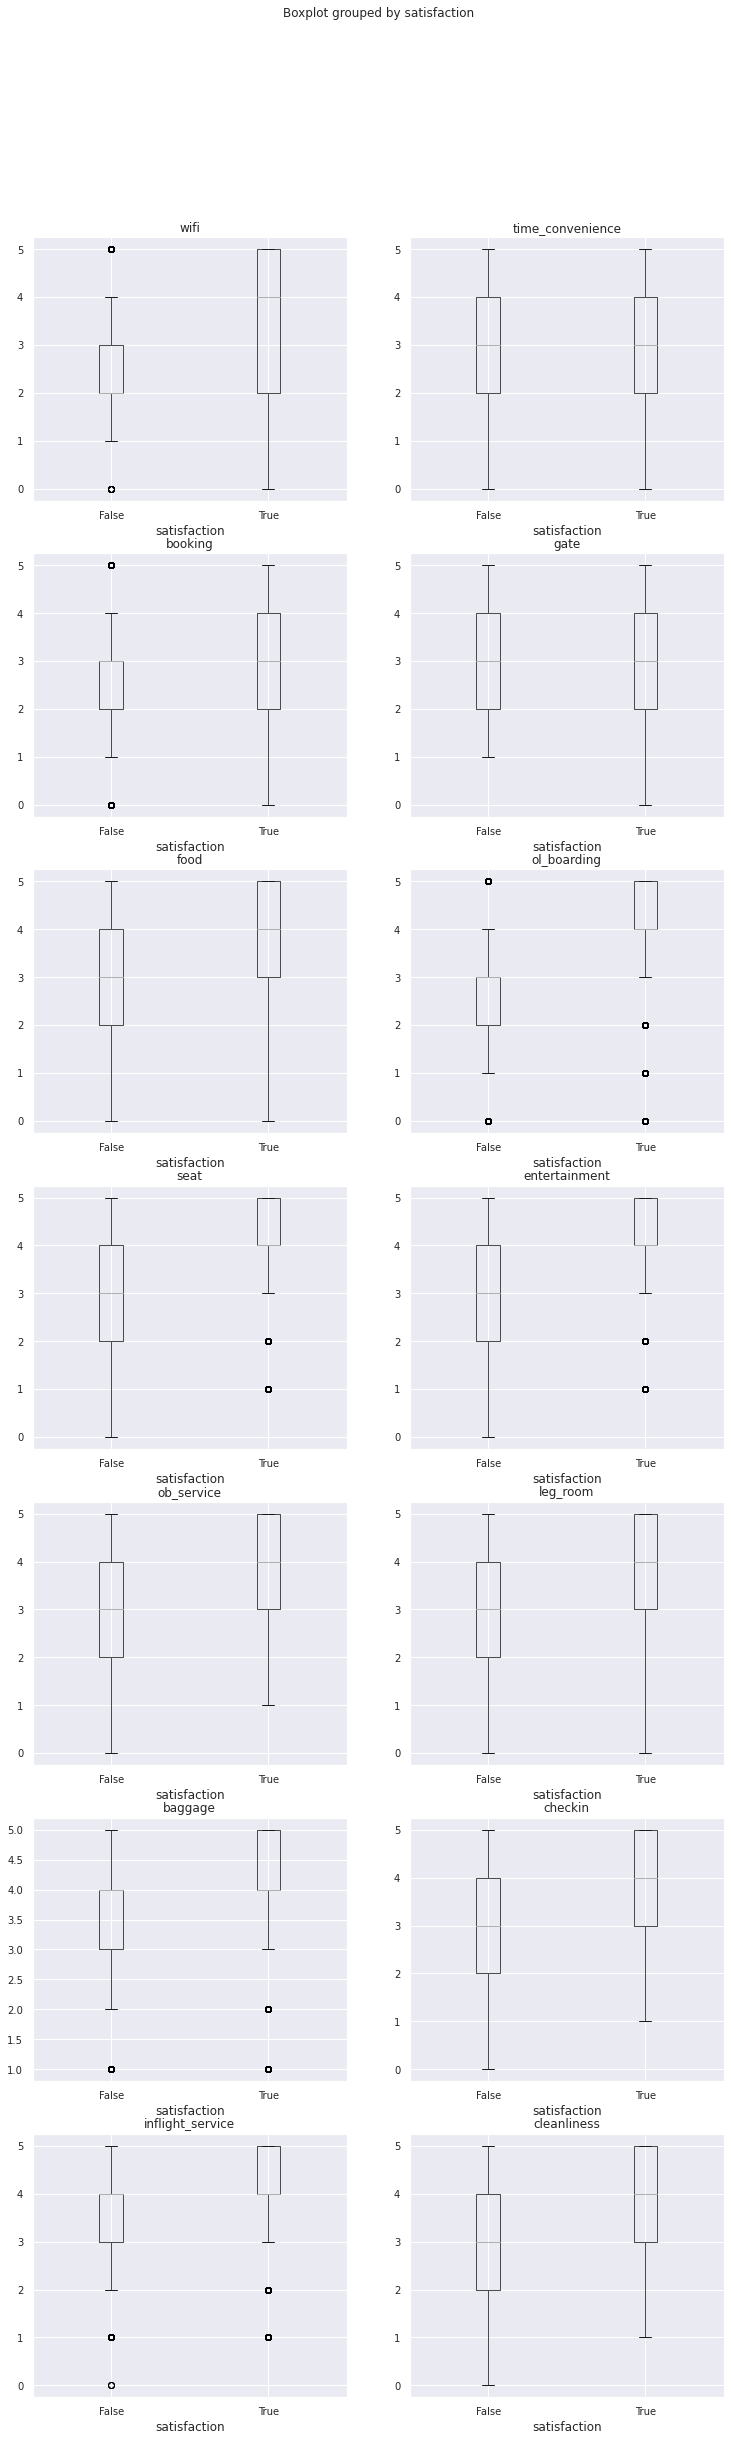

In [12]:
df_rated = df_n.filter(["wifi", "time_convenience", "booking", "gate", "food", "ol_boarding", "seat", "entertainment", "ob_service", "leg_room", "baggage", "checkin", "inflight_service", "cleanliness", "satisfaction"])

fig, axes = plt.subplots(7, 2, figsize=(12,40))

for i,el in enumerate(list(df_rated.columns.values)[:-1]):
    a = df_rated.boxplot(el, by="satisfaction", ax=axes.flatten()[i], fontsize=10)


Using the boxplots, I identified the following categories that appear to have a significant difference in ratings between overall satisfied and unsatisfied customers. These are the categories I will focus more on in my analysis:

* wifi
* food
* ol_boarding
* seat
* entertainment
* leg_room
* baggage
* checkin
* inflight_service
* cleanliness
* ob_service

### Non-Rating Columns ###

I also wanted to consider some of the non-rating features, as they likely also had an impact on customer satisfaction. In my investigation of the arrival and departure delays, it appeared there were some data points that may be outliers. I used a strip plot and a box plot to visualize the distribution of departure delays:

In [13]:
df_focus = df_n.filter(["baggage", "wifi", "food", "ol_boarding", "seat", "entertainment", "leg_room", "checkin", "inflight_service", "cleanliness", "ob_service", "class", "dep_delay", "arr_delay", "distance", "satisfaction"]).copy()

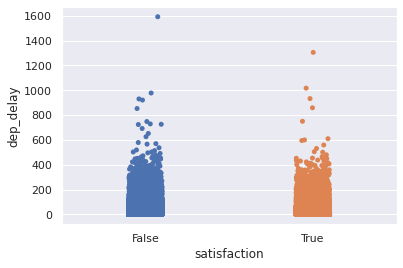

In [14]:
sns.stripplot(x="satisfaction", y="dep_delay", data=df_focus, jitter=True)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


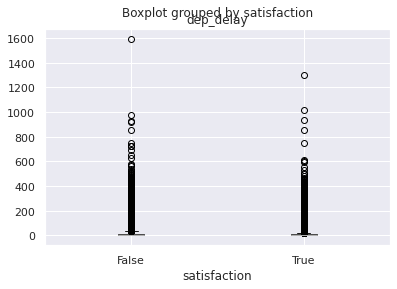

In [15]:
df_n.boxplot(column="dep_delay", by="satisfaction")

Clearly the majority of flights had a small or no delay, and the box plot identified many data points as outliers. However, I still wanted to consider delays as I thought it was reasonable to assume long delays would have an impact on satisfaction. Therefore, I decided to choose a delay limit of 600 (10 hours) to exclude the most extreme outliers:

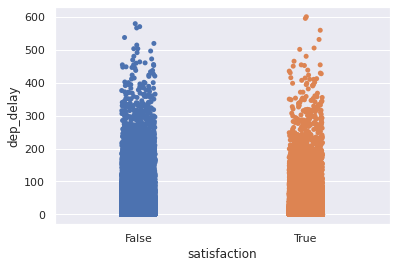

In [16]:
df_focus = df_focus[df_focus["dep_delay"] <= 600]
sns.stripplot(x="satisfaction", y="dep_delay", data=df_focus, jitter=True);

### Correlation Matrix ###

To help visualize the relationship between the columns, I created a correlation matrix and applied a heatmap:

In [17]:
corr_matrix = df_focus.corr()
corr_matrix

,baggage,wifi,food,ol_boarding,seat,entertainment,leg_room,checkin,inflight_service,cleanliness,ob_service,class,dep_delay,arr_delay,distance,satisfaction
baggage,1.000000,0.120920,0.034673,0.083250,0.074514,0.378191,0.369568,0.233125,0.628669,0.095769,0.519228,-0.160485,-0.006112,-0.009231,0.063194,0.247737
wifi,0.120920,1.000000,0.134619,0.456989,0.122599,0.209400,0.160572,0.043121,0.110500,0.132647,0.121541,-0.036268,-0.016730,-0.018450,0.007181,0.284219
food,0.034673,0.134619,1.000000,0.234374,0.574514,0.622659,0.032539,0.087147,0.033952,0.657744,0.059062,-0.085855,-0.029795,-0.032448,0.056999,0.209821
ol_boarding,0.083250,0.456989,0.234374,1.000000,0.420111,0.285112,0.123944,0.204313,0.074607,0.331399,0.155430,-0.322946,-0.020270,-0.023269,0.214950,0.503549
seat,0.074514,0.122599,0.574514,0.420111,1.000000,0.610685,0.105563,0.191683,0.069227,0.678469,0.131959,-0.227440,-0.028427,-0.030327,0.157414,0.349407
entertainment,0.378191,0.209400,0.622659,0.285112,0.610685,1.000000,0.299686,0.120870,0.404898,0.691924,0.420170,-0.194419,-0.028634,-0.031828,0.128769,0.398134
leg_room,0.369568,0.160572,0.032539,0.123944,0.105563,0.299686,1.000000,0.153146,0.368687,0.096368,0.355529,-0.204951,0.013691,0.011144,0.133908,0.313161
checkin,0.233125,0.043121,0.087147,0.204313,0.191683,0.120870,0.153146,1.000000,0.237259,0.179410,0.243923,-0.151589,-0.018903,-0.020853,0.073131,0.236101
inflight_service,0.628669,0.110500,0.033952,0.074607,0.069227,0.404898,0.368687,0.237259,1.000000,0.088806,0.550790,-0.156363,-0.055213,-0.059539,0.057569,0.244768
cleanliness,0.095769,0.132647,0.657744,0.331399,0.678469,0.691924,0.096368,0.179410,0.088806,1.000000,0.123209,-0.135792,-0.014396,-0.016111,0.093209,0.305141


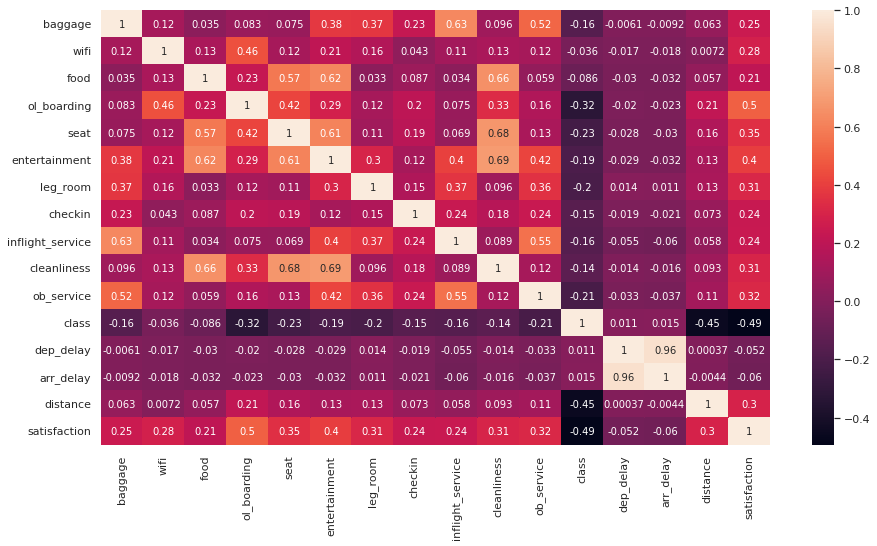

In [18]:
plt.figure(figsize=[15,8])
sns.heatmap(corr_matrix, annot=True)
plt.show()

Unsurprisingly, the dep_delay and arr_delay had a very high correlation. This makes sense as a plane that is delayed on departure will also have an arrival delay of approximately the same amount. I will drop the arr_delay column and use only dep_delay in the model.

Looking at the correlation of other columns with the satisfaction column, class immediately stands out as having a significant negative correlation with satisfaction. This is to be expected, as increasing class values correspond to lower classes (recall economy class is value 3, while business class is 1). The rating-based columns all have a positive correlation with satisfaction to varying degrees. The delay columns have very low negative correlation to satisfaction with values close to zero, so I decided to omit them from the model phase. Interestingly, flight distance has a positive correlation with satisfaction. Based on my own experience, I would expect longer flights to be more stressful and have a lower satisfaction rating, but according to the data this is not the case.

### Conclusions of Analysis ###

After my analysis, I had narrowed the list of features I would consider for my models to the following:

* baggage
* wifi
* food
* ol_boarding
* seat
* entertainment
* leg_room
* checkin
* inflight_service
* cleanliness
* ob_service
* class
* distance

Based on the boxplots and correlation matrix I thought these would have the greatest effect on overall satisfaction

### Model Selection ###

I decided to try to fit logistic regression and support vector machine models to the data. Due to the binary nature of the target (customer satisfaction), I I knew logistic regression would be a good starting point. Due to the large number of features, I knew logistic regression would likely not result in the most accurate fit and I would have to be careful to avoid over-fitting.

Support vector machine (SVM) would do better with the many features but requires more pre-processing for good performance and does not do well will large sample sizes. Therefore, I ended up standardizing the feature data and also reducing the size of the train data.

### Logistic Regression ###

I began with logistic regression. I separated out the columns I wanted to include and split the data into test and train sets. I wanted to see the effect of including different numbers of features, so I started with a null model and repeatedly added in the feature that resulted in the highest accuracy until I had added all 13 features, similar to forward stepwise selection.

In [19]:
x = df_focus[["baggage", "wifi", "leg_room", "food", "ol_boarding", "seat", "entertainment", "checkin", "inflight_service", "cleanliness", "ob_service", "class", "distance"]]
y = df_focus["satisfaction"].replace({True: 1, False: 0})

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=15)

In [20]:
lr = LogisticRegression(max_iter=100)
x_select1 = ["ol_boarding"]
log_model1 = lr.fit(x_train[x_select1], y_train)
y_pred1=log_model1.predict(x_test[x_select1])

In [57]:
print("1 Feature")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))
print("Precision:",metrics.precision_score(y_test, y_pred1))
print("Recall:",metrics.recall_score(y_test, y_pred1))

1 Feature
Accuracy: 0.7898121053442169
Precision: 0.7259040819494025
Recall: 0.829181810123216


In [22]:
lr2 = LogisticRegression(max_iter=100)
x_select2 = ["ol_boarding", "entertainment"]
log_model2 = lr2.fit(x_train[x_select2], y_train)
y_pred2=log_model2.predict(x_test[x_select2])

In [58]:
print("2 Features")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))
print("Precision:",metrics.precision_score(y_test, y_pred2))
print("Recall:",metrics.recall_score(y_test, y_pred2))

2 Features
Accuracy: 0.7980902510395811
Precision: 0.7808690797431841
Recall: 0.7439056821203794


In [24]:
lr3 = LogisticRegression(max_iter=300)
x_select3 = ["ol_boarding", "entertainment", "class"]
log_model3 = lr3.fit(x_train[x_select3], y_train)
y_pred3=log_model3.predict(x_test[x_select3])

In [25]:
print("3 Features")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred3))
print("Precision:",metrics.precision_score(y_test, y_pred3))
print("Recall:",metrics.recall_score(y_test, y_pred3))

Accuracy: 0.811065763129524
Precision: 0.7807929515418502
Recall: 0.7855686552610585


In [26]:
lr4 = LogisticRegression(max_iter=300)
x_select4 = ["ol_boarding", "entertainment", "class", "leg_room"]
log_model4 = lr4.fit(x_train[x_select4], y_train)
y_pred4=log_model4.predict(x_test[x_select4])

In [59]:
print("4 Features")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred4))
print("Precision:",metrics.precision_score(y_test, y_pred4))
print("Recall:",metrics.recall_score(y_test, y_pred4))

4 Features
Accuracy: 0.8321654089018944
Precision: 0.828555154737042
Recall: 0.7736902756847798


In [28]:
lr5 = LogisticRegression(max_iter=300)
x_select5 = ["ol_boarding", "entertainment", "class", "leg_room", "wifi"]
log_model5 = lr5.fit(x_train[x_select5], y_train)
y_pred5=log_model5.predict(x_test[x_select5])

In [60]:
print("5 Features")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred5))
print("Precision:",metrics.precision_score(y_test, y_pred5))
print("Recall:",metrics.recall_score(y_test, y_pred5))

5 Features
Accuracy: 0.8331279839827507
Precision: 0.819050243409571
Recall: 0.7904441095647549


In [30]:
lr6 = LogisticRegression(max_iter=700)
x_select6 = ["ol_boarding", "entertainment", "class", "leg_room", "wifi", "distance"]
log_model6 = lr6.fit(x_train[x_select6], y_train)
y_pred6=log_model6.predict(x_test[x_select6])

In [61]:
print("6 Features")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred6))
print("Precision:",metrics.precision_score(y_test, y_pred6))
print("Recall:",metrics.recall_score(y_test, y_pred6))

6 Features
Accuracy: 0.8384028954258432
Precision: 0.8256712026480324
Recall: 0.79602872085808


In [32]:
lr7 = LogisticRegression(max_iter=700)
x_select7 = ["ol_boarding", "entertainment", "class", "leg_room", "wifi", "distance", "checkin"]
log_model7 = lr7.fit(x_train[x_select7], y_train)
y_pred7=log_model7.predict(x_test[x_select7])

In [62]:
print("7 Features")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred7))
print("Precision:",metrics.precision_score(y_test, y_pred7))
print("Recall:",metrics.recall_score(y_test, y_pred7))

7 Features
Accuracy: 0.8369782843061759
Precision: 0.8277979346915992
Recall: 0.7887598617143871


In [34]:
lr8 = LogisticRegression(max_iter=700)
x_select8 = ["ol_boarding", "entertainment", "class", "leg_room", "wifi", "distance", "checkin", "baggage"]
log_model8 = lr8.fit(x_train[x_select8], y_train)
y_pred8=log_model8.predict(x_test[x_select8])

In [63]:
print("8 Features")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred8))
print("Precision:",metrics.precision_score(y_test, y_pred8))
print("Recall:",metrics.recall_score(y_test, y_pred8))

8 Features
Accuracy: 0.8368242722932389
Precision: 0.826942716553709
Recall: 0.7895576633277192


In [36]:
lr9 = LogisticRegression(max_iter=700)
x_select9 = ["ol_boarding", "entertainment", "class", "leg_room", "wifi", "distance", "checkin", "baggage", "seat"]
log_model9 = lr9.fit(x_train[x_select9], y_train)
y_pred9=log_model9.predict(x_test[x_select9])

In [64]:
print("9 Features")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred9))
print("Precision:",metrics.precision_score(y_test, y_pred9))
print("Recall:",metrics.recall_score(y_test, y_pred9))

9 Features
Accuracy: 0.8365932542738334
Precision: 0.8268462610311194
Recall: 0.7890257955854978


In [38]:
lr10 = LogisticRegression(max_iter=700)
x_select10 = ["ol_boarding", "entertainment", "class", "leg_room", "wifi", "distance", "checkin", "baggage", "seat", "cleanliness"]
log_model10 = lr10.fit(x_train[x_select10], y_train)
y_pred10=log_model10.predict(x_test[x_select10])

In [65]:
print("10 Features")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred10))
print("Precision:",metrics.precision_score(y_test, y_pred10))
print("Recall:",metrics.recall_score(y_test, y_pred10))

10 Features
Accuracy: 0.8372093023255814
Precision: 0.8275285594873224
Recall: 0.7898235971988299


In [40]:
lr11 = LogisticRegression(max_iter=700)
x_select11 = ["ol_boarding", "entertainment", "class", "leg_room", "wifi", "distance", "checkin", "baggage", "seat", "cleanliness", "ob_service"]
log_model11 = lr11.fit(x_train[x_select11], y_train)
y_pred11=log_model11.predict(x_test[x_select11])

In [66]:
print("11 Features")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred11))
print("Precision:",metrics.precision_score(y_test, y_pred11))
print("Recall:",metrics.recall_score(y_test, y_pred11))

11 Features
Accuracy: 0.8379408593870322
Precision: 0.8289914402679568
Recall: 0.7898235971988299


In [42]:
lr12 = LogisticRegression(max_iter=700)
x_select12 = ["ol_boarding", "entertainment", "class", "leg_room", "wifi", "distance", "checkin", "baggage", "seat", "cleanliness", "ob_service", "inflight_service"]
log_model12 = lr12.fit(x_train[x_select12], y_train)
y_pred12=log_model12.predict(x_test[x_select12])

In [67]:
print("12 Features")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred12))
print("Precision:",metrics.precision_score(y_test, y_pred12))
print("Recall:",metrics.recall_score(y_test, y_pred12))

12 Features
Accuracy: 0.8375558293546896
Precision: 0.8284040178571429
Recall: 0.7895576633277192


In [44]:
lr13 = LogisticRegression(max_iter=700)
x_all = ["ol_boarding", "entertainment", "class", "leg_room", "wifi", "distance", "checkin", "baggage", "seat", "cleanliness", "ob_service", "inflight_service", "food"]
log_model13 = lr13.fit(x_train[x_all], y_train)
y_pred13=log_model13.predict(x_test[x_all])

In [68]:
print("13 Features")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred13))
print("Precision:",metrics.precision_score(y_test, y_pred13))
print("Recall:",metrics.recall_score(y_test, y_pred13))

13 Features
Accuracy: 0.8380178653935006
Precision: 0.8293909480350158
Recall: 0.7894690187040156


In [46]:
log_models = [log_model1, log_model2, log_model3, log_model4, log_model5, log_model6, log_model7, log_model8, log_model9, log_model10, log_model11, log_model12, log_model13]

I wanted to consider a metric other than just accuracy and have a more direct visual comparison of the models, so I plotted each model's ROC curve and calculated the AUC for each. The AUC shows how well the model distinguishes between classes. The plot shows a large improvement in the models' fit from a single feature to about 5 features, at which point the curves become relatively indistinguishable, maxing out at around .83 accuracy and .90 AUC. Given the limitations of logistic regression for capturing more complex relationships with multiple features, the model performed relatively well, but I still wanted to explore SVM to see if I could get a better fit.

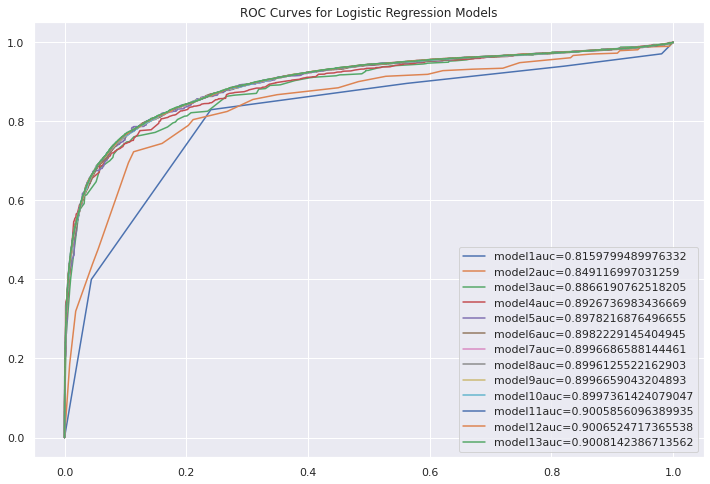

In [69]:

plt.figure(figsize=[12,8])

for i in range(len(log_models)):
    model = log_models[i]
    y_pred_prob = model.predict_proba(x_test[x_all[0:i+1]])[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label="model"+str(i+1)+"auc="+str(metrics.roc_auc_score(y_test, y_pred_prob)))

plt.legend(loc=4)
plt.title("ROC Curves for Logistic Regression Models")
plt.show()

I attempted to fit an SVM model using the same train data, but quickly realized for efficiency's sake I needed to make some adjustments. I first reduced the sample size, as I learned SVM is more processing-intensive than logistic regression for large datasets. I also scaled the data, which I learned was necessary through research.

In [48]:
df_svm = df_focus[["baggage", "wifi", "leg_room", "food", "ol_boarding", "seat", "entertainment", "checkin", "inflight_service", "cleanliness", "ob_service", "class", "distance", "satisfaction"]]
df_svm = df_svm.sample(frac=.25, replace=False)

sx_train = df_svm[["baggage", "wifi", "leg_room", "food", "ol_boarding", "seat", "entertainment", "checkin", "inflight_service", "cleanliness", "ob_service", "class", "distance"]]
sy_train = df_svm["satisfaction"].replace({True: 1, False: 0})

scaler = StandardScaler()
sx_train_std = scaler.fit_transform(sx_train)

In [49]:
sx_train_std

array([[ 1.15703615,  0.96059643,  1.2505345 , ...,  1.25523752,
        -1.01430663, -0.88161949],
       [ 0.31353582,  1.71305783, -1.02639505, ...,  0.47746701,
         0.0255028 , -0.28743533],
       [-0.52996452, -1.29678779, -1.78537157, ..., -0.30030351,
         1.06531222,  0.45554621],
       ...,
       [ 1.15703615, -0.54432639, -1.02639505, ..., -0.30030351,
        -1.01430663, -0.53777688],
       [ 0.31353582,  0.96059643, -0.26741853, ..., -1.85584454,
         0.0255028 , -0.81325313],
       [-0.52996452,  0.96059643, -1.02639505, ..., -1.07807403,
         1.06531222, -0.9630559 ]])

I then tried to fit the model using different kernels, or types of hyperplanes that would separate the classes. I used four different linear and non-linear kernels: Linear, RBF, Polynomial, and Sigmoid.

In [50]:
svm1 = svm.SVC(kernel='linear')
svm1.fit(sx_train_std, sy_train)

SVC(kernel='linear')

In [76]:
scaler2 = StandardScaler()
x_test_std = scaler.fit_transform(x_test)

y_pred_svm1 = svm1.predict(x_test_std)
print("Linear Kernel")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svm1))
print("Precision:",metrics.precision_score(y_test, y_pred_svm1))
print("Recall:",metrics.recall_score(y_test, y_pred_svm1))

Linear Kernel
Accuracy: 0.8423302017557369
Precision: 0.8455472206193498
Recall: 0.7793635316018084


In [55]:
svm2 = svm.SVC(kernel='rbf')
svm2.fit(sx_train_std, sy_train)

SVC()

In [77]:
y_pred_svm2 = svm2.predict(x_test_std)
print("RBF Kernel")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svm2))
print("Precision:",metrics.precision_score(y_test, y_pred_svm2))
print("Recall:",metrics.recall_score(y_test, y_pred_svm2))

RBF Kernel
Accuracy: 0.9297320190974896
Precision: 0.9376967228291058
Recall: 0.8978813934934846


In [70]:
svm3 = svm.SVC(kernel='poly')
svm3.fit(sx_train_std, sy_train)

SVC(kernel='poly')

In [78]:
y_pred_svm3 = svm3.predict(x_test_std)
print("Polynomial Kernel")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svm3))
print("Precision:",metrics.precision_score(y_test, y_pred_svm3))
print("Recall:",metrics.recall_score(y_test, y_pred_svm3))

Polynomial Kernel
Accuracy: 0.8922685969505622
Precision: 0.9034528678778655
Recall: 0.8419466359365304


In [72]:
svm4 = svm.SVC(kernel='sigmoid')
svm4.fit(sx_train_std, sy_train)

SVC(kernel='sigmoid')

In [79]:
y_pred_svm4 = svm4.predict(x_test_std)
print("Sigmoid Kernel")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svm4))
print("Precision:",metrics.precision_score(y_test, y_pred_svm4))
print("Recall:",metrics.recall_score(y_test, y_pred_svm4))

Sigmoid Kernel
Accuracy: 0.7377175419682735
Precision: 0.6982521515393487
Recall: 0.6976331885471146


Clearly the most successful fit was the RBF kernel, with an accuracy of almost .93. I then turned to hyperparameters to see if I could improve the fit. First I considered the gamma, which controls how closely the model tries to fit the data. Higher values give a more specific fit, but can lead to overfitting. I tested a wide range of values first and then narrowed down to values close to 0.5 for the most accurate fit.

In [75]:
gammas = [0.5, 1, 10, 100]

for gamma in gammas:
  svm_rbf = svm.SVC(kernel='rbf', gamma = gamma)
  svm_rbf.fit(sx_train_std, sy_train)
  y_pred_rbf = svm_rbf.predict(x_test_std)
  print("Gamma:",gamma)
  print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rbf))
  print("Precision:",metrics.precision_score(y_test, y_pred_rbf))
  print("Recall:",metrics.recall_score(y_test, y_pred_rbf))

Gamma: 0.5
Accuracy: 0.9402818419836747
Precision: 0.9513824457227686
Recall: 0.9089619714564312
Gamma: 1
Accuracy: 0.9206838133374403
Precision: 0.9603594608087869
Recall: 0.8525839907809591
Gamma: 10
Accuracy: 0.7172339442476513
Precision: 0.9880981899330523
Recall: 0.3532488254587359
Gamma: 100
Accuracy: 0.6908978900354228
Precision: 0.994226678821027
Recall: 0.2900452087580888


Gamma: 0.425
Accuracy: 0.94078238102572
Precision: 0.950189446446724
Recall: 0.9114440209201312
Gamma: 0.45
Accuracy: 0.9408978900354228
Precision: 0.9508697261287935
Recall: 0.9110007978016134
Gamma: 0.475
Accuracy: 0.9405128600030802
Precision: 0.950907743608744
Recall: 0.910025706940874


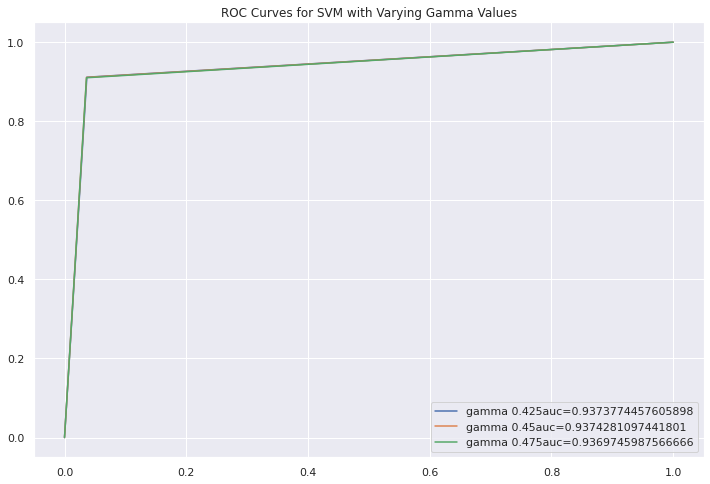

In [85]:
gammas = [0.425, 0.45, 0.475]

plt.figure(figsize=[12,8])

for gamma in gammas:
  svm_rbf = svm.SVC(kernel='rbf', gamma = gamma)
  svm_rbf.fit(sx_train_std, sy_train)
  y_pred_rbf = svm_rbf.predict(x_test_std)
  print("Gamma:",gamma)
  print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rbf))
  print("Precision:",metrics.precision_score(y_test, y_pred_rbf))
  print("Recall:",metrics.recall_score(y_test, y_pred_rbf))
  fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_rbf)
  plt.plot(fpr, tpr, label="gamma "+str(gamma)+"auc="+str(metrics.roc_auc_score(y_test, y_pred_rbf)))

plt.legend(loc=4)
plt.title("ROC Curves for SVM with Varying Gamma Values")
plt.show()

I then did the same for C values, which is similar to gamma and controls the smoothness of the decision boundaries. A C value that is too high can also cause overfitting.

C: 2
Accuracy: 0.9424380101647929
Precision: 0.9484054252199413
Recall: 0.9173832107082706
C: 3
Accuracy: 0.9426690281841984
Precision: 0.9465523531557826
Recall: 0.9199539047956742
C: 4
Accuracy: 0.9416294470968736
Precision: 0.944874715261959
Recall: 0.9192447478060456


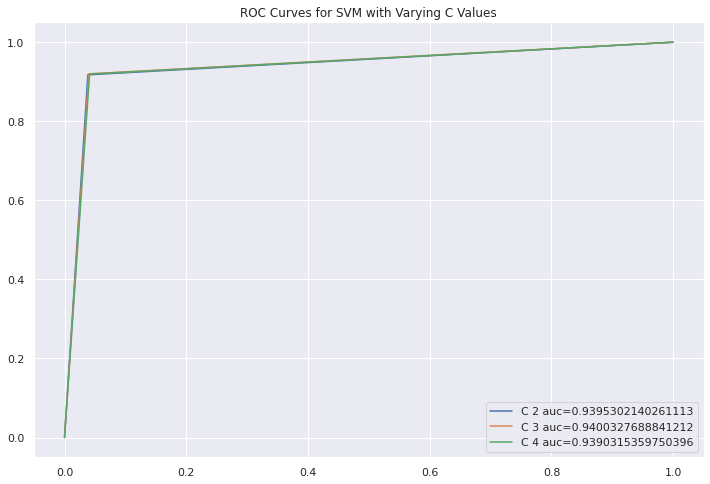

In [88]:
cs = [2, 3, 4]

plt.figure(figsize=[12,8])

for c in cs:
  svm_rbf = svm.SVC(kernel='rbf', gamma = 0.45, C = c)
  svm_rbf.fit(sx_train_std, sy_train)
  y_pred_rbf = svm_rbf.predict(x_test_std)
  print("C:",c)
  print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rbf))
  print("Precision:",metrics.precision_score(y_test, y_pred_rbf))
  print("Recall:",metrics.recall_score(y_test, y_pred_rbf))
  fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_rbf)
  plt.plot(fpr, tpr, label="C "+str(c)+" auc="+str(metrics.roc_auc_score(y_test, y_pred_rbf)))

plt.legend(loc=4)
plt.title("ROC Curves for SVM with Varying C Values")
plt.show()

The final, best-fit model was the SVM with RBF kernel, gamma of 0.45, and C of 3

### Conclusions ###

As expected, the SVM model did a better job of fitting the data and predicting the test values. The logistic regression model had decent accuracy, precision, and AUC, but as the number of features considered increased, the model's performance leveled out and could not match the fit of SVM, especially after I adjusted the hyperparameters to fine-tune the fit. The process of adding features for the logistic regression model also helped identify which features were most directly related to customer satisfaction; a model with just "ol_boarding", "entertainment", "class", "leg_room", and "wifi" predicted satisfaction nearly as well as models with many more features. If I were the airline company, I would focus resources on these features to maximize the effect on customer satisfaction.

Creating both models allowed me to better understand classification problems and how to approach them using the tools I learned in class. I learned more about preprocessing data and what metrics to use to evaluate my models. I also identified some areas I'd like to further explore, like different ways to encode categorical or ordinal features and multinomial classification problems. Overall I enjoyed the project and appreciated being able to have some creativity with the problem I chose and learn through trial and error.

Resources used outside of class material:

* https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python
* https://www.geeksforgeeks.org/drop-rows-from-the-dataframe-based-on-certain-condition-applied-on-a-column/
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
* https://datatofish.com/correlation-matrix-pandas/
* https://scikit-learn.org/stable/modules/svm.html
* https://www.geeksforgeeks.org/how-to-randomly-select-rows-from-pandas-dataframe/
* https://medium.com/all-things-ai/in-depth-parameter-tuning-for-svc-758215394769